In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_enso = pd.read_csv("data/ENSO.csv", low_memory=False)

In [2]:
df_enso_reduced = df_enso.iloc[120:900,:].reset_index()
df_enso_reduced

,index,Unnamed: 0,Date,Year,Month,Global Temperature Anomalies,Global Precipitation,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,...,PNA,OLR,SOI,Season (2-Month),MEI.ext,MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,120,120,1960-01-01,1960,JAN,0.04,NaN,NaN,NaN,NaN,...,-0.16,NaN,0.1,DJ,-0.070,NaN,DJF,-0.1,1960-1961,N
1,121,121,1960-02-01,1960,FEB,0.15,NaN,NaN,NaN,NaN,...,-0.22,NaN,0.1,JF,0.073,NaN,JFM,-0.1,1960-1961,N
2,122,122,1960-03-01,1960,MAR,-0.24,NaN,NaN,NaN,NaN,...,-0.69,NaN,1.0,FM,0.106,NaN,FMA,-0.1,1960-1961,N
3,123,123,1960-04-01,1960,APR,-0.11,NaN,NaN,NaN,NaN,...,-0.07,NaN,0.8,MA,0.167,NaN,MAM,0.0,1960-1961,N
4,124,124,1960-05-01,1960,MAY,-0.07,NaN,NaN,NaN,NaN,...,0.99,NaN,0.5,AM,0.177,NaN,AMJ,0.0,1960-1961,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,895,895,2024-08-01,2024,AUG,1.27,84.55,20.52,-0.34,24.97,...,-1.04,0.5,0.9,JA,NaN,-0.73,JAS,-0.1,2024-2025,N
776,896,896,2024-09-01,2024,SEP,1.25,80.73,19.91,-0.68,24.85,...,1.08,0.5,-0.1,AS,NaN,-0.65,ASO,-0.2,2024-2025,N
777,897,897,2024-10-01,2024,OCT,1.33,84.96,20.55,-0.32,25.04,...,0.20,0.8,0.5,SO,NaN,-0.52,SON,-0.3,2024-2025,N
778,898,898,2024-11-01,2024,NOV,1.32,81.76,21.88,0.26,25.17,...,0.05,1.1,0.5,ON,NaN,-0.68,OND,-0.4,2024-2025,N


In [3]:
df_enso.columns

Index(['Unnamed: 0', 'Date', 'Year', 'Month', 'Global Temperature Anomalies',
       'Global Precipitation', 'Nino 1+2 SST', 'Nino 1+2 SST Anomalies',
       'Nino 3 SST', 'Nino 3 SST Anomalies', 'Nino 3.4 SST',
       'Nino 3.4 SST Anomalies', 'Nino 4 SST', 'Nino 4 SST Anomalies',
       'TNI OISST', 'TNI HadISST', 'PNA', 'OLR', 'SOI', 'Season (2-Month)',
       'MEI.ext', 'MEI.v2', 'Season (3-Month)', 'ONI', 'Season (12-Month)',
       'ENSO Phase-Intensity'],
      dtype='object')

In [4]:
# ENSO Strength
enso_phases = [
    "Moderate La Niña",
    "Moderate El Niño",
    "Weak El Niño",
    "Weak La Niña",
    "Strong El Niño",
    "Neutral",
    "Strong La Niña",
    "Very Strong El Niño"
]
print(df_enso["ENSO Phase-Intensity"].unique(),"\n \n",enso_phases)

['ML' 'ME' 'WE' 'WL' 'SE' 'N' 'SL' 'VSE'] 
 
 ['Moderate La Niña', 'Moderate El Niño', 'Weak El Niño', 'Weak La Niña', 'Strong El Niño', 'Neutral', 'Strong La Niña', 'Very Strong El Niño']


In [5]:
# Fix years for plotting
years = np.arange(1960, 2025)     # 1950 → 2024 inclusive
months = np.arange(12)            # 0 → 11

# Each month is 1/12 of a year apart
xaxis = [year + m/12 for year in years for m in months]

print(xaxis[:15])   # show first 15 values
print(len(xaxis))   # should be 900 (75 years * 12 months)


[np.float64(1960.0), np.float64(1960.0833333333333), np.float64(1960.1666666666667), np.float64(1960.25), np.float64(1960.3333333333333), np.float64(1960.4166666666667), np.float64(1960.5), np.float64(1960.5833333333333), np.float64(1960.6666666666667), np.float64(1960.75), np.float64(1960.8333333333333), np.float64(1960.9166666666667), np.float64(1961.0), np.float64(1961.0833333333333), np.float64(1961.1666666666667)]
780


In [9]:
df_enso_reduced.iloc[:,5]

0      0.04
1      0.15
2     -0.24
3     -0.11
4     -0.07
       ... 
775    1.27
776    1.25
777    1.33
778    1.32
779    1.29
Name: Global Temperature Anomalies, Length: 780, dtype: float64

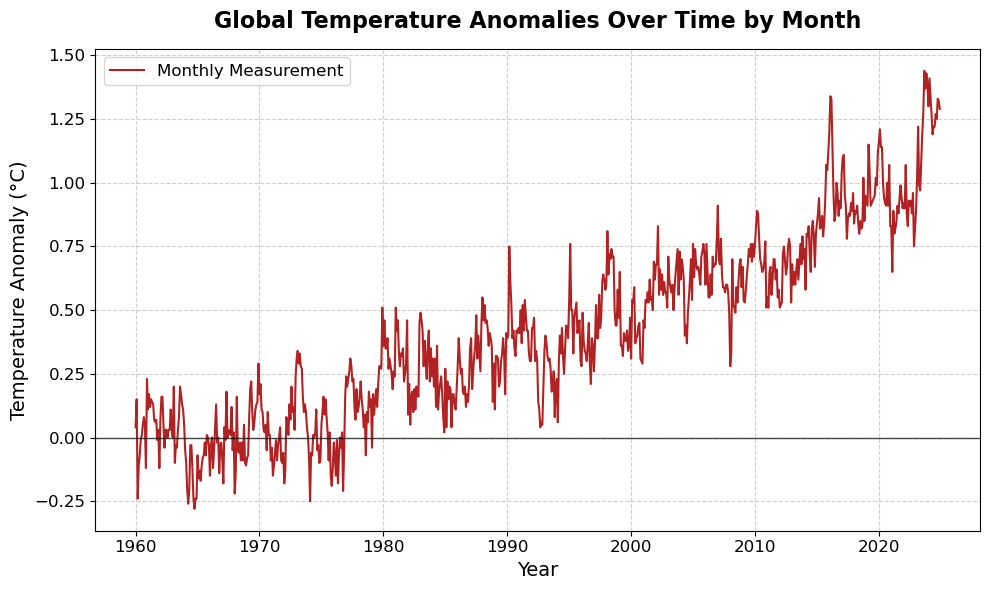

In [10]:
# Extract years and montly global temperatuer anomaly
temp_anom = df_enso_reduced.iloc[:,5]
y = temp_anom 

plt.figure(figsize=(10,6))  # wider figure for readability

plt.plot(xaxis, y, color="firebrick", linestyle='-', label="Monthly Measurement")

# Titles and labels
plt.title("Global Temperature Anomalies Over Time by Month", fontsize=16, weight="bold", pad=15)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Anomaly (°C)", fontsize=14)

# Gridlines and axis formatting
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.axhline(0, color="black", linewidth=1, alpha=0.7)  # reference line at 0°C anomaly

# Tick styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.show()